In [8]:
import pandas as pd
import numpy as np

#creating dataframe from the CSV data file
df = pd.read_csv('ibm_brisbane_calibrations_2024-10-11T13_37_10Z.csv')

# calculating summary statistics for the key parameters in the csv data file
summary_stats = df.agg({
    'T1 (us)': ['mean', 'std', 'min', 'max'],
    'T2 (us)': ['mean', 'std', 'min', 'max'],
    'Readout assignment error ': ['mean', 'std', 'min', 'max'],
    'ID error ': ['mean', 'std', 'min', 'max']
})

print("Summary Statistics:")
print(summary_stats)

## here, i calculated average gate error
avg_gate_errors = df[['Z-axis rotation (rz) error ', '√x (sx) error ', 'Pauli-X error ']].mean()

print("\nAverage Gate Errors:")
print(avg_gate_errors)

# Count operational qubits
operational_qubits = df['Operational'].sum()

print(f"\nNumber of operational qubits: {operational_qubits}")

Summary Statistics:
         T1 (us)     T2 (us)  Readout assignment error   ID error 
mean  233.976930  157.167033                   0.022431   0.000461
std    63.316238   84.521011                   0.025354   0.001209
min    64.291227   16.768472                   0.004500   0.000099
max   403.499932  355.471519                   0.145600   0.011477

Average Gate Errors:
Z-axis rotation (rz) error     0.000000
√x (sx) error                  0.000461
Pauli-X error                  0.000461
dtype: float64

Number of operational qubits: 127


# Interpretation of this data

We ran our code in the IBM Brisbane QPU <br>

We found that the coherence times T1 and T2 vary significantly across qubits, which means. The times found here are very short which could limit the circuit depth for better QRNG. <br>

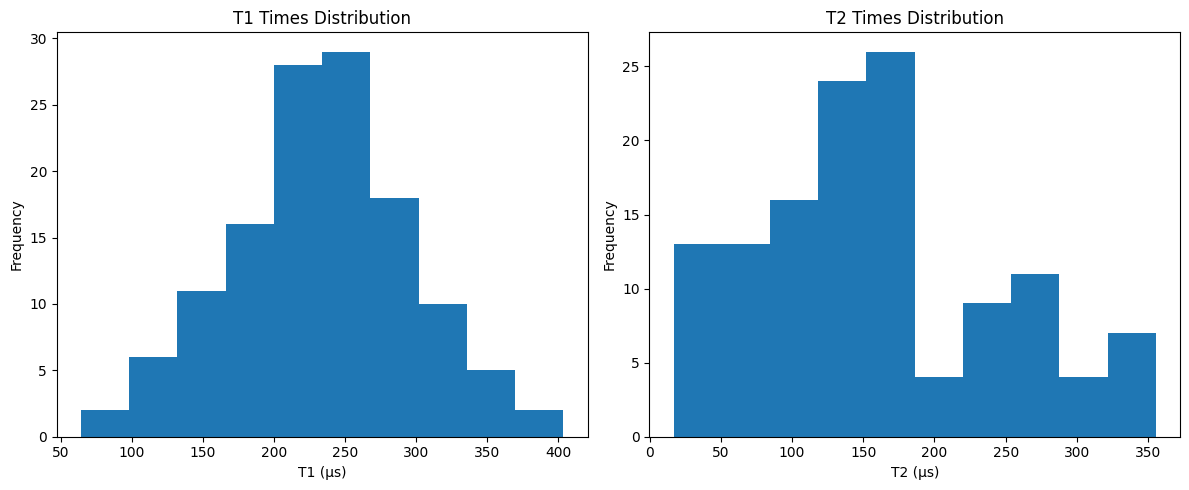

In [6]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(df['T1 (us)'], bins=10)
ax1.set_title('T1 Times Distribution')
ax1.set_xlabel('T1 (μs)')
ax1.set_ylabel('Frequency')

ax2.hist(df['T2 (us)'], bins=10)
ax2.set_title('T2 Times Distribution')
ax2.set_xlabel('T2 (μs)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()